# 绘制各类别准确率评估指标柱状图

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [2]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

--2022-08-28 16:03:27--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  18.2MB/s    用时 0.5s    

2022-08-28 16:03:28 (18.2 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



## 导入工具包

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 导入各类别准确率评估指标表格

In [4]:
df = pd.read_csv('各类别准确率评估指标.csv')

In [5]:
df

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,哈密瓜,0.909091,0.789474,0.845070,38.0,0.789474,0.927853,0.992897
1,圣女果,0.928571,0.684211,0.787879,38.0,0.684211,0.892679,0.994691
2,山竹,1.000000,0.828571,0.906250,35.0,0.828571,0.997550,0.999918
3,杨梅,0.864865,0.864865,0.864865,37.0,0.864865,0.960977,0.995928
4,柚子,0.756757,0.756757,0.756757,37.0,0.756757,0.816588,0.986253
5,柠檬,0.774194,0.827586,0.800000,29.0,0.827586,0.819273,0.991363
6,桂圆,0.760000,1.000000,0.863636,38.0,1.000000,0.992567,0.999697
7,梨,0.852941,0.783784,0.816901,37.0,0.783784,0.921136,0.996291
8,椰子,0.944444,0.894737,0.918919,38.0,0.894737,0.953389,0.997598
9,榴莲,0.935484,0.805556,0.865672,36.0,0.805556,0.936241,0.993954


## 选择评估指标

In [6]:
# feature = 'precision'
# feature = 'recall'
# feature = 'f1-score'
feature = 'accuracy'
# feature = 'AP'
# feature = 'AUC'

## 绘制柱状图

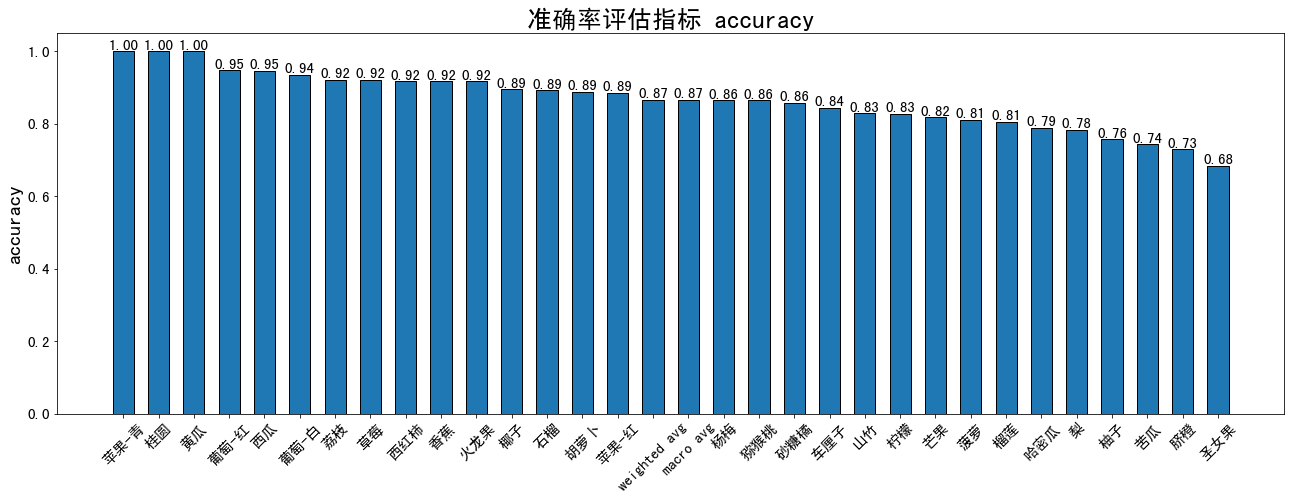

In [7]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

ax = plt.bar(x, y, width=0.6, facecolor='#1f77b4', edgecolor='k')
plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值

plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
# plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title('准确率评估指标 {}'.format(feature), fontsize=25)

plt.savefig('各类别准确率评估指标柱状图-{}.pdf'.format(feature), dpi=120, bbox_inches='tight')

plt.show()